
--- Logistic Regression Evaluation ---
Accuracy: 0.9924242424242424
Precision (Fake): 0.992798353909465
Recall (Fake): 0.9917780061664954
F1 Score (Fake): 0.9922879177377892
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       973
        Real       0.99      0.99      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980


--- Random Forest Evaluation ---
Accuracy: 0.9974747474747475
Precision (Fake): 0.9979423868312757
Recall (Fake): 0.9969167523124358
F1 Score (Fake): 0.9974293059125964
Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       973
        Real       1.00      1.00      1.00      1007

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted a

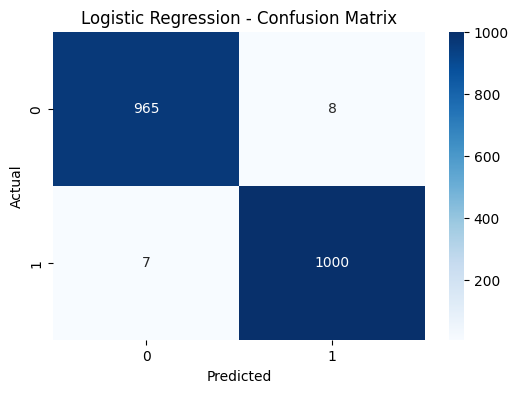

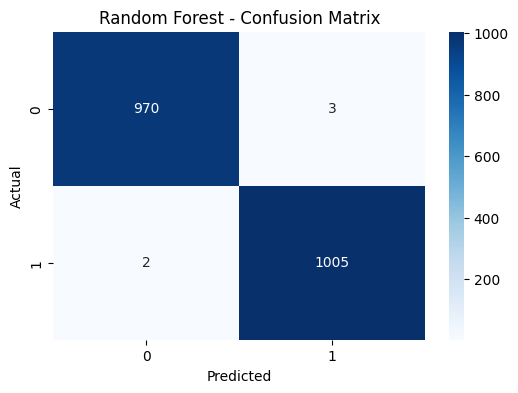

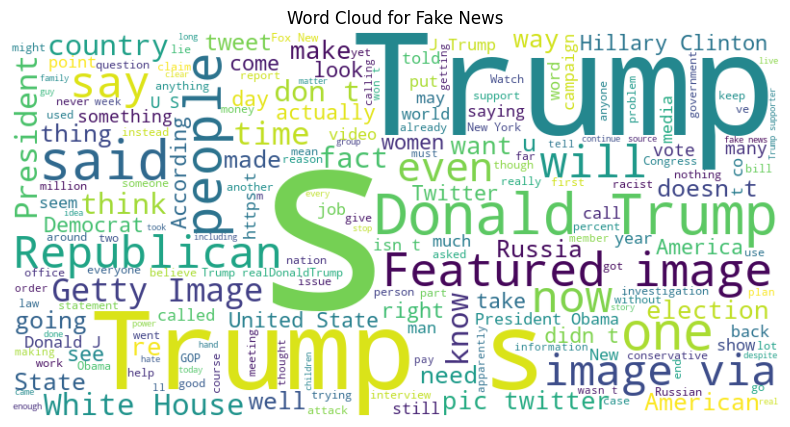

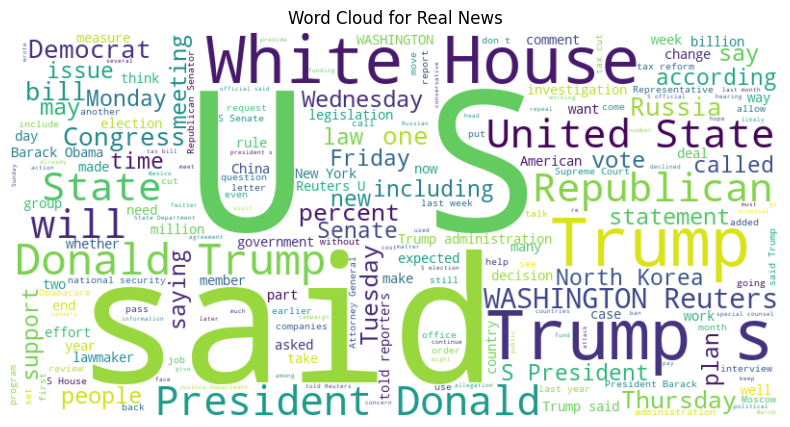

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv("fake_and_real_news.csv")
df.dropna(inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["label"], test_size=0.2, random_state=42)

# Logistic Regression Model
log_model = make_pipeline(TfidfVectorizer(), LogisticRegression())
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Random Forest Model
rf_model = make_pipeline(TfidfVectorizer(stop_words='english'), RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ------------------- Evaluation Function -------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (Fake):", precision_score(y_true, y_pred, pos_label='Fake'))
    print("Recall (Fake):", recall_score(y_true, y_pred, pos_label='Fake'))
    print("F1 Score (Fake):", f1_score(y_true, y_pred, pos_label='Fake'))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# ------------------- Confusion Matrices -------------------
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, log_pred, "Logistic Regression")
plot_conf_matrix(y_test, rf_pred, "Random Forest")

# ------------------- Word Clouds -------------------
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

fake_text = " ".join(df[df['label'] == 'Fake']["Text"])
real_text = " ".join(df[df['label'] == 'Real']["Text"])

generate_wordcloud(fake_text, "Word Cloud for Fake News")
generate_wordcloud(real_text, "Word Cloud for Real News")
